# Assignment 3: Implementation, Analysis, Performance Evaluation and Comparison of Deep Convolutional Neural Networks for Image Classification

**Objective:** The objective of this assignment is to implement a deep convolutional neural network (CNN) for the identification of flower types. The provided dataset consists of five classes of flowers, namely chamomile, tulip, rose, sunflower, and dandelion.

**Tasks:**
To complete this assignment, please submit a single notebook that includes the implementation and outputs of the following seven steps.
Provide answers for each sub-question by thorough analysis and extensive experimental investigation using the provided dataset. In other words, your answers should be backed by experimental analysis of your models and the dataset. Please ensure that the notebook retain the outputs. Failure to do so will result in zero marks for the corresponding steps in which no output is displayed.

In [ ]:
%ls

Assignment3-Q.ipynb  history_base.pkl               model_base_l2.h5
CNN.png              history_l2_bn_drop.pkl         model_l2_bn_drop.h5
flowers/             history_resnet50_finetune.pkl  model_resnet50_finetune.h5
flowers_split/       history_vgg16_finetune.pkl     model_vgg16_finetune.h5
flowers.zip          history_vgg16.pkl              model_vgg16.h5
history_base_bn.pkl  model_base_bn.h5               taken_imgs/
history_base_l2.pkl  model_base.h5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab Notebooks/ai/assignment3

/content/drive/MyDrive/Colab Notebooks/ai/assignment3


In [ ]:
%cd taken_imgs


/content/drive/My Drive/Colab Notebooks/ai/assignment3/taken_imgs


In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/ai/assignment3


**1. Prepare and Preprocess the data. (15 points)**

**Q1. What is the total number of images in the dataset, and how are they distributed across the five flower types?**

&nbsp;&nbsp;&nbsp;&nbsp;The dataset consists of a total of 4,357 images distributed across five types of flowers:
- **Daisy**: 764 images
- **Dandelion**: 1,054 images
- **Rose**: 784 images
- **Sunflower**: 733 images
- **Tulip**: 984 images

**Q2. Do we need to implement techniques to balance the distribution of images across various flower types, such as oversampling or undersampling?**

&nbsp;&nbsp;&nbsp;&nbsp;According to the distribution of flower types, there is not much difference among these types. I don’t think we need to implement techniques such as oversampling or undersampling.

**Q3. What are the dimensions (height and width) of the images in the dataset, and is there any variation among different flower types?**

&nbsp;&nbsp;&nbsp;&nbsp;According to the Flower Dimensions:
- The dimensions of the images in the dataset range from around 50px to over 1000px, which is not uniform.
- Yes, there is a high degree of variance in the image dimensions.

**Q4. What preprocessing techniques should be applied, such as resizing, normalization or standardization and why?**

&nbsp;&nbsp;&nbsp;&nbsp;Because images are not the same size, resizing should be applied. Other preprocessing techniques such as normalization or standardization should also be considered because they might help stabilize the training process and improve inference performance. However, I will not apply these techniques for the first model.

**Q5. How would you split the dataset into training, validation and testing sets, and in what ratios?**

&nbsp;&nbsp;&nbsp;&nbsp;I split the dataset into training, validation, and testing sets in a ratio of 80/10/10 respectively using the `splitfolders` module.



In [1]:
import zipfile
# import splitfolders
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#CNN model libraries
import keras
import tensorflow as tf
from tensorflow import Tensor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,BatchNormalization,Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
import pickle
#Evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import glob
from keras.preprocessing import image
from tensorflow.keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import DenseNet121, InceptionV3, MobileNetV3Large, ResNet50, MobileNetV2
from tensorflow.keras.models import load_model

2024-04-14 11:31:23.144391: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 11:31:23.359115: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 11:31:23.359176: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 11:31:23.386490: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 11:31:23.453092: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-14 11:31:23.455077: I tensorflow/core/platform/cpu_feature_guard.cc:1

# Data exploration

In [ ]:
# folder_dir = './flowers.zip'
# zip_ref = zipfile.ZipFile(folder_dir, 'r')
# zip_ref.extractall('./')
# zip_ref.close()

In [ ]:
# root_dir = './flowers'
# out_dir = './flowers_split'
# splitfolders.ratio(root_dir, output=out_dir, seed=1337, ratio=(.8, .1, .1))

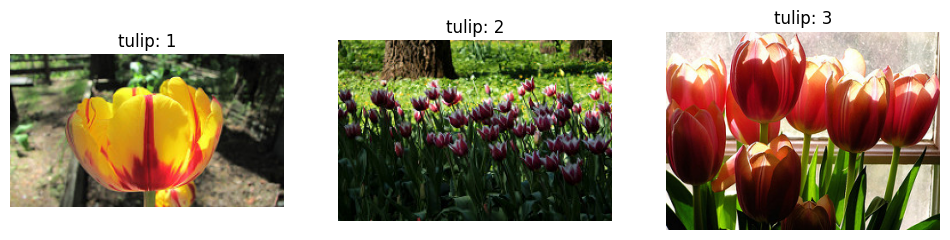

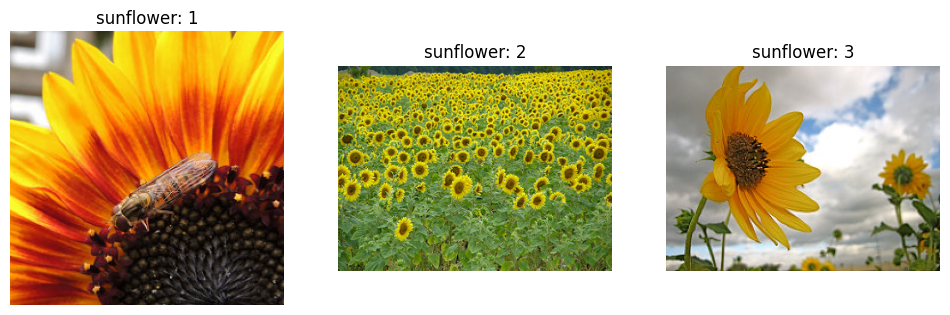

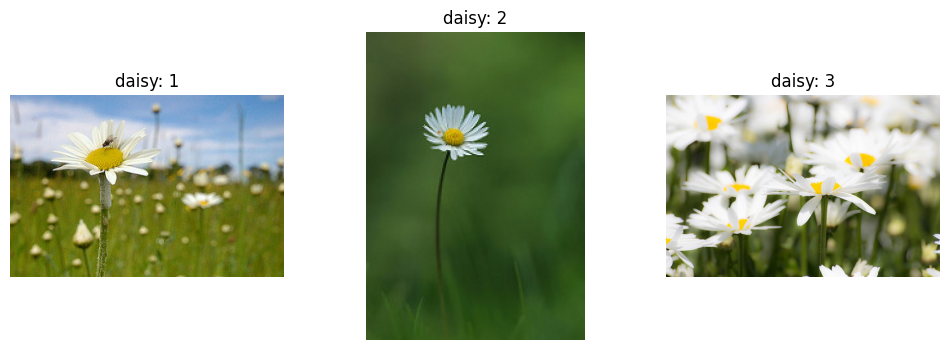

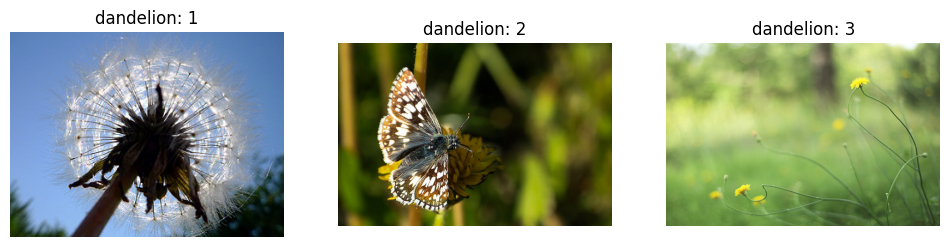

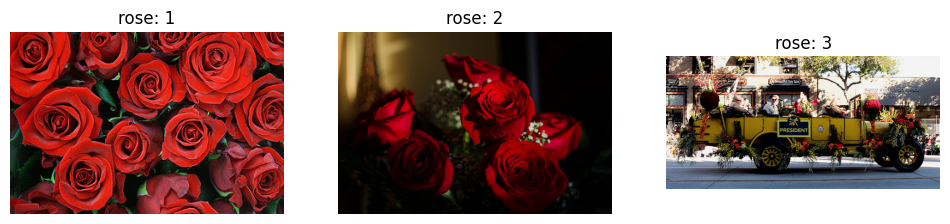

Total number of Daisy images: 764
Total number of Dandelion images: 764
Total number of Rose images: 784
Total number of Sunflower images: 733
Total number of Tulip images: 984
Total number of images: 4357


In [ ]:
unsplit_data_dir = './flowers'

daisy_nums = 0
dandelion_nums = 0
rose_nums = 0
sunflower_nums = 0
tulip_nums = 0

daisy_dims = []
dandelion_dims = []
rose_dims = []
sunflower_dims = []
tulip_dims = []

for type_flower_dir in os.listdir(unsplit_data_dir):
    image_names = os.listdir(os.path.join(unsplit_data_dir, type_flower_dir))

    for image_name in image_names:
        image_path = os.path.join(unsplit_data_dir, type_flower_dir, image_name)
        img = mpimg.imread(image_path)
        if type_flower_dir == 'daisy':
            daisy_dims.append(img.shape)
        elif type_flower_dir == 'dandelion':
            dandelion_dims.append(img.shape)
        elif type_flower_dir == 'rose':
            rose_dims.append(img.shape)
        elif type_flower_dir == 'sunflower':
            sunflower_dims.append(img.shape)
        elif type_flower_dir == 'tulip':
            tulip_dims.append(img.shape)

    if type_flower_dir == 'daisy':
        daisy_nums = len(image_names)
    elif type_flower_dir == 'dandelion':
        dandelion_nums = len(image_names)
    elif type_flower_dir == 'rose':
        rose_nums = len(image_names)
    elif type_flower_dir == 'sunflower':
        sunflower_nums = len(image_names)
    elif type_flower_dir == 'tulip':
        tulip_nums = len(image_names)



    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    sample_image_names = image_names[:3]
    for i, image_name in enumerate(sample_image_names):
        image_path = os.path.join(unsplit_data_dir, type_flower_dir, image_name)
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].axis('off')
        axs[i].set_title(f'{type_flower_dir}: {i+1}')

    plt.show()


print(f'Total number of Daisy images: {daisy_nums}')
print(f'Total number of Dandelion images: {daisy_nums}')
print(f'Total number of Rose images: {rose_nums}')
print(f'Total number of Sunflower images: {sunflower_nums}')
print(f'Total number of Tulip images: {tulip_nums}')
print(f'Total number of images: {daisy_nums + dandelion_nums + rose_nums + sunflower_nums + tulip_nums}')


In [ ]:
# Flower types
flower_types = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

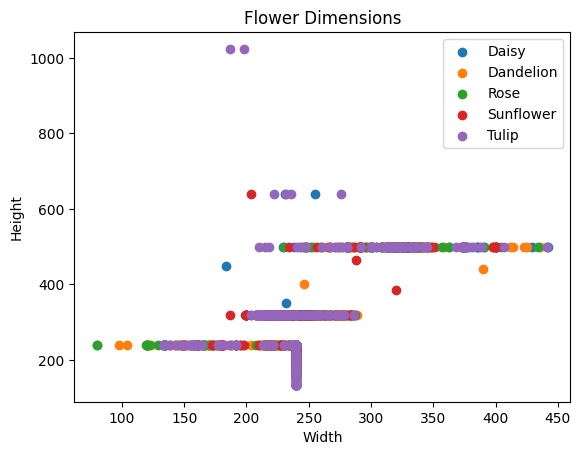

In [ ]:
# Dimensions
flower_dims = [daisy_dims, dandelion_dims, rose_dims, sunflower_dims, tulip_dims]

# Plot scatter of flower_dims
for i, dim in enumerate(flower_dims):
    x = [d[0] for d in dim]
    y = [d[1] for d in dim]
    plt.scatter(x, y, label=flower_types[i])

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Flower Dimensions')
plt.legend()
plt.show()

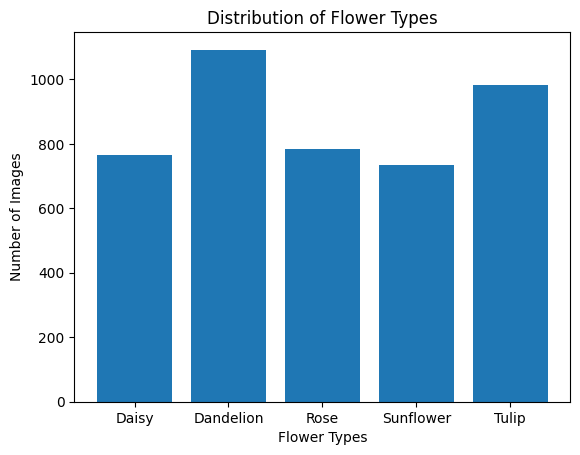

In [ ]:
flower_nums = [daisy_nums, dandelion_nums, rose_nums, sunflower_nums, tulip_nums]

plt.bar(flower_types, flower_nums)
plt.xlabel('Flower Types')
plt.ylabel('Number of Images')
plt.title('Distribution of Flower Types')
plt.show()


# Preprocessing data

In [ ]:
train_dir = './flowers_split/train'
val_dir = './flowers_split/val'
test_dir = './flowers_split/test'

img_height = 224
img_width = 224
batch = 64


train_gen = ImageDataGenerator(
      rescale=1./255)

val_datagen = ImageDataGenerator(
      rescale=1./255)

test_datagen = ImageDataGenerator(
      rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch,
    class_mode='sparse',
    shuffle = True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch,
    class_mode='sparse',
    shuffle = False)

classes = list(val_generator.class_indices.keys())

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch,
    class_mode='sparse',
    shuffle = False)


Found 3532 images belonging to 5 classes.
Found 430 images belonging to 5 classes.
Found 475 images belonging to 5 classes.


**2. Implement the given CNN architecture. Make necessary changes in the final layers for it to work on the number of classes in the given dataset. Use an input image size of $224 \times 224 \times 3$ (10 points)**
<img src='CNN.png' alt='given CNN'>

# Base model

In [ ]:
model_base = Sequential(name='model_base')
model_base.add(Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3),padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model_base.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model_base.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model_base.add(Flatten())
model_base.add(Dense(4096, activation='relu',kernel_initializer='he_normal'))
model_base.add(Dense(4096, activation='relu',kernel_initializer='he_normal'))
model_base.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 1e-4)
model_base.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_base.summary()

Model: "model_base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                  

**3. Train the model. (15 Points)**

Q3.1. What is your approach for selecting the appropriate hyperparameters for the model training, such as the learning rate, number of epochs, batch size, and optimizer?
* I started with learning rate = 0.0001, batch size = 64, and optimizer = Adam. After looking at the training process with accuracy and loss, I might have to change those hyperparameters and explain when that happen

Q3.2 What methods do you use for monitoring the training progress and performance of the model and why?
* Accuracy and Loss are two metrics used to evaluate training and evaluating processes. Because by looking at the line of train and validation, we can easily detect overfitting or underfitting

Q3.3 What metrics would you prefer to measure the performance, such as accuracy, precision, recall, F1 score, or ROC-AUC and why?
* Accuracy, precision, recall and F1-score were all used to measure the performance of the testing dataset. I chose that because looking at those metrics might be easier to detect which class the model performed well and poorly and make some adjustment to balance along those all classes.


In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_base = model_base.fit(train_generator, epochs=20, validation_data=val_generator, verbose=1)

# Save history
with open('history_base.pkl', 'wb') as file:
    pickle.dump(history_base.history, file)

model_base.save('model_base.h5')


Epoch 1/20
56/56 [==============================] - 33s 501ms/step - loss: 1.7567 - accuracy: 0.3389 - val_loss: 1.1859 - val_accuracy: 0.4907
Epoch 2/20
56/56 [==============================] - 30s 526ms/step - loss: 1.1601 - accuracy: 0.5229 - val_loss: 1.0134 - val_accuracy: 0.5860
Epoch 3/20
56/56 [==============================] - 27s 473ms/step - loss: 1.0236 - accuracy: 0.5832 - val_loss: 0.9509 - val_accuracy: 0.6047
Epoch 4/20
56/56 [==============================] - 26s 469ms/step - loss: 0.9086 - accuracy: 0.6325 - val_loss: 0.8291 - val_accuracy: 0.6907
Epoch 5/20
56/56 [==============================] - 26s 470ms/step - loss: 0.9125 - accuracy: 0.6339 - val_loss: 0.9662 - val_accuracy: 0.5814
Epoch 6/20
56/56 [==============================] - 27s 482ms/step - loss: 0.7872 - accuracy: 0.7016 - val_loss: 0.8604 - val_accuracy: 0.6628
Epoch 7/20
56/56 [==============================] - 26s 466ms/step - loss: 0.6952 - accuracy: 0.7358 - val_loss: 0.7784 - val_accuracy: 0.7070

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
model_base = load_model('model_base.h5')

# Load the history
with open('history_base.pkl', 'rb') as file:
    history_base = pickle.load(file)


**4. Report the results. (10 points)**

Q4.1 What is the final accuracy of the model on the validation set, and how does it compare to the training accuracy?
* Final accuracy on validation dataset is 0.6767 and on training dataset is 0.9802. The base model is overfitting because validation and training accuracy should be closed to each other

Q4.2 What is the confusion matrix for the model on the validation set, and which flower types are the most difficult to classify?
* Confustion matrix for the model is plotted below. By looking at F1-score and the heatmap figure, I found Roses which has the lowest F1-score (0.60) is the flower types make the model confused the most.

Q4.3 How does the model perform on individual flower types, and are there any particular images that the model struggles to classify?


Q4.4 What is the rough model complexity?
* Model has total params: 134281029 (512.24 MB). It has 13 convolutional layers and 3 Fully connected layers.

Q4.5 Is the model's large size contributing to any challenges or constraints in its performance on the given dataset.
* Yes, the model can be called a large model. The metrics also indicated that, the model was **overfitting**, which means the architecture is too complicated. And also the validation loss and accuracy were **fluctuated**, so we might need to implement technique to mitigate overfitting and unstable performance such as **L2** and **Batch Normalization**

In [ ]:
def plot_history(history):
    """
    Plots the loss and accuracy of the training and validation data
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    # plt.plot(history['loss'], label='Training Loss')
    # plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    # plt.plot(history['accuracy'], label='Training Accuracy')
    # plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.show()

def plot_confusion_matrix(y_true, y_pred):
    report = classification_report(y_true, y_pred,target_names = classes, zero_division=0)
    print(report)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap="Blues",xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

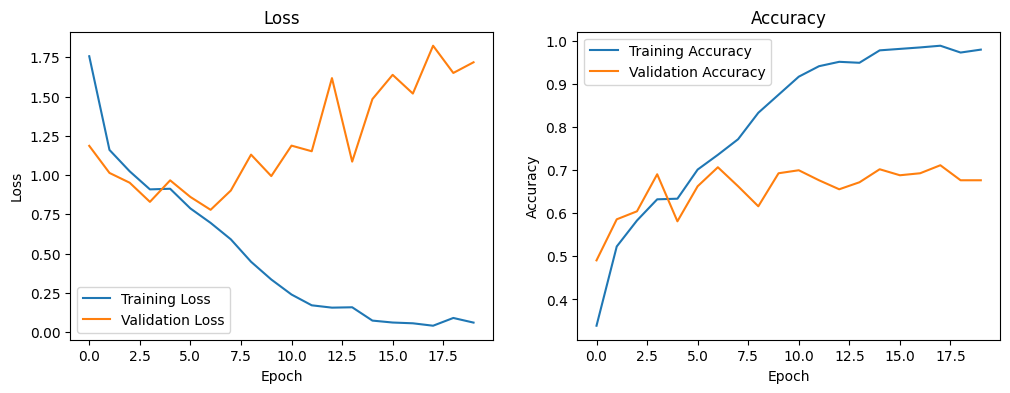

7/7 [==============================] - 4s 566ms/step
              precision    recall  f1-score   support

       daisy       0.75      0.58      0.65        76
   dandelion       0.66      0.84      0.74       105
        rose       0.56      0.64      0.60        78
   sunflower       0.84      0.66      0.74        73
       tulip       0.67      0.62      0.65        98

    accuracy                           0.68       430
   macro avg       0.70      0.67      0.67       430
weighted avg       0.69      0.68      0.68       430



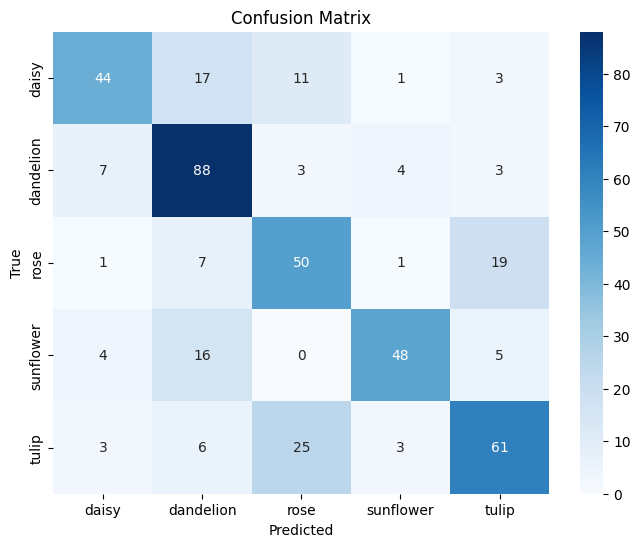

In [ ]:
plot_history(history_base)

y_pred = model_base.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)

**5. Test the model by giving it a picture taken by your own phone camera. (10 points)**

* How can the accuracy of the model on the picture taken by your own phone camera be evaluated?

* What can be done if the model does not perform well on the picture taken by your own phone camera?


In [ ]:
taken_img_dir = "./taken_imgs"

taken_img_datagen = ImageDataGenerator(
      rescale=1./255)

taken_img_generator = taken_img_datagen.flow_from_directory(
    taken_img_dir,
    target_size=(img_height,img_width),
    batch_size=batch,
    class_mode=None,
    shuffle=False
)

predictions = model_base.predict(taken_img_generator)
pred_class = classes[np.argmax(predictions)]

photo_img_path = glob.glob(taken_img_dir+'/unknown/*')[0]
confidence_score = predictions[0][np.argmax(predictions[0])]
img = image.load_img(photo_img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
plt.imshow(img_array/ 255.0)
plt.title(f"True: Daisy, Predicted: {pred_class} ({confidence_score*100:.3f}%)")
plt.show()

Found 1 images belonging to 1 classes.


NameError: name 'model_base' is not defined

**6. Use the same architecture but now train two different models one with L1 or L2 regularization, and one with batch normalization. (20 points)**


Q6.1 Based on the results of the regularized and batch normalized models, how effective are L1 or L2 regularization and batch normalization techniques? How do they impact the model's performance, convergence, size, and inference time?
* 

Q6.2 How do the learned weights of the L1 or L2 regularized models compare to the baseline model? Provide any insights on the differences in the learned weights and what it implies for the model's performance and interpretability?

Q6.3 What insights can be drawn from the comprehensive analysis of the regularized and batch normalized models regarding the use of regularization and normalization techniques in training machine learning models?

# Base model with L2


In [ ]:
model_base_l2 = Sequential(name='model_base_l2')
model_base_l2.add(Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3),padding='same',kernel_initializer='he_normal'))
model_base_l2.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_l2.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_l2.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_l2.add(Flatten())
model_base_l2.add(Dense(4096, activation='relu',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Dense(4096, activation='relu',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_base_l2.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 1e-4)
model_base_l2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_base_l2.summary()

Model: "model_base_l2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history_base_l2 = model_base_l2.fit(train_generator, epochs=20, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_base_l2.pkl', 'wb') as file:
    pickle.dump(history_base_l2.history, file)

# Save model
model_base_l2.save('model_base_l2.h5')

Epoch 1/20
56/56 [==============================] - 1171s 20s/step - loss: 206.0722 - accuracy: 0.3188 - val_loss: 167.3062 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 29s 516ms/step - loss: 140.0427 - accuracy: 0.4938 - val_loss: 116.2234 - val_accuracy: 0.4953
Epoch 3/20
56/56 [==============================] - 30s 524ms/step - loss: 99.3520 - accuracy: 0.5266 - val_loss: 83.8328 - val_accuracy: 0.5349
Epoch 4/20
56/56 [==============================] - 30s 532ms/step - loss: 72.7217 - accuracy: 0.5614 - val_loss: 62.4426 - val_accuracy: 0.5116
Epoch 5/20
56/56 [==============================] - 30s 540ms/step - loss: 54.6566 - accuracy: 0.5793 - val_loss: 47.5509 - val_accuracy: 0.6279
Epoch 6/20
56/56 [==============================] - 31s 549ms/step - loss: 42.1486 - accuracy: 0.5965 - val_loss: 37.1596 - val_accuracy: 0.5814
Epoch 7/20
56/56 [==============================] - 31s 551ms/step - loss: 33.2759 - accuracy: 0.6005 - val_loss: 29.6277 - va

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


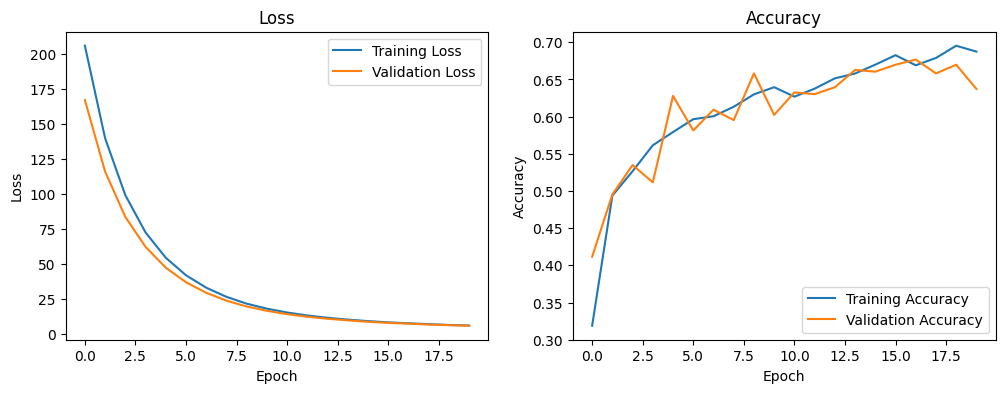

7/7 [==============================] - 2s 243ms/step
              precision    recall  f1-score   support

       daisy       0.82      0.61      0.70        76
   dandelion       0.63      0.83      0.71       105
        rose       0.62      0.17      0.26        78
   sunflower       0.77      0.63      0.69        73
       tulip       0.53      0.84      0.65        98

    accuracy                           0.64       430
   macro avg       0.67      0.61      0.60       430
weighted avg       0.66      0.64      0.61       430



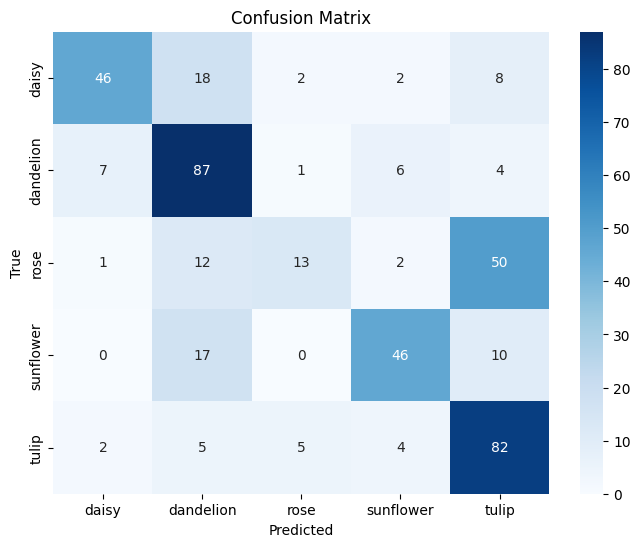

In [ ]:
plot_history(history_base_l2)

y_pred = model_base_l2.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)

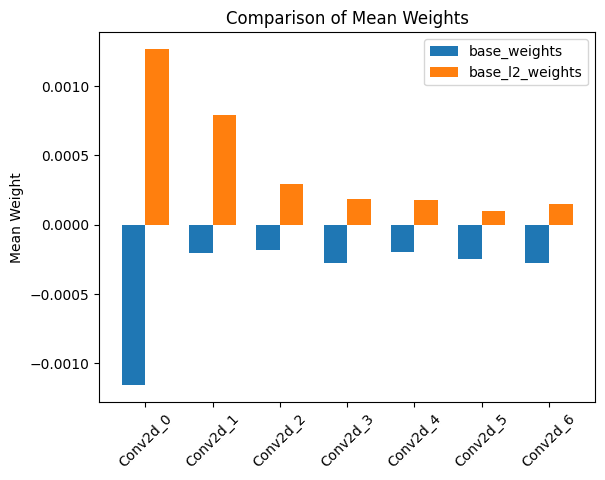

In [ ]:
base_weights = []

for layer in model_base.layers[:10]:
  W = layer.get_weights()
  if len(W) == 0:
    continue
  for idx, w in enumerate(W):
    arr = np.ndarray.flatten(w)
    mean_weight = arr.mean()

    if idx == 0:
        base_weights.append(mean_weight)

base_l2_weights = []

for layer in model_base_l2.layers[:10]:
  W = layer.get_weights()
  if len(W) == 0:
    continue
  for idx, w in enumerate(W):
    arr = np.ndarray.flatten(w)
    mean_weight = arr.mean()

    if idx == 0:
        base_l2_weights.append(mean_weight)

# Data
labels = [f'Conv2d_{i}' for i in range(len(base_weights))]

# Plotting
x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, base_weights, width, label='base_weights')
rects2 = ax.bar([i + width for i in x], base_l2_weights, width, label='base_l2_weights')

# Add labels, title, and legend
ax.set_ylabel('Mean Weight')
ax.set_title('Comparison of Mean Weights')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels, rotation=45)

ax.legend()

# Show the plot
plt.show()


# Base model with Batch normalization

In [ ]:
model_base_bn = Sequential(name='model_base_bn')
model_base_bn.add(Conv2D(64, (3,3), activation='relu', input_shape=(img_width, img_height, 3),padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(BatchNormalization())
model_base_bn.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_bn.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(BatchNormalization())
model_base_bn.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_bn.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(BatchNormalization())
model_base_bn.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(BatchNormalization())
model_base_bn.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal'))
model_base_bn.add(BatchNormalization())
model_base_bn.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
model_base_bn.add(Flatten())
model_base_bn.add(Dense(4096, activation='relu'))
model_base_bn.add(Dense(4096, activation='relu'))
model_base_bn.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 1e-4)
model_base_bn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_base_bn.summary()

Model: "model_base_bn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_80 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_9 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_82 (Conv2D)          (None, 112, 112, 128)   

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_base_bn = model_base_bn.fit(train_generator, epochs=20, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_base_bn.pkl', 'wb') as file:
    pickle.dump(history_base_bn.history, file)

# Save model
model_base_bn.save('model_base_bn.h5')

Epoch 1/20
56/56 [==============================] - 39s 599ms/step - loss: 2.4184 - accuracy: 0.4507 - val_loss: 2.0608 - val_accuracy: 0.2535
Epoch 2/20
56/56 [==============================] - 33s 587ms/step - loss: 0.9223 - accuracy: 0.6438 - val_loss: 4.0816 - val_accuracy: 0.2465
Epoch 3/20
56/56 [==============================] - 33s 588ms/step - loss: 0.7590 - accuracy: 0.7055 - val_loss: 3.1096 - val_accuracy: 0.2465
Epoch 4/20
56/56 [==============================] - 33s 586ms/step - loss: 0.7146 - accuracy: 0.7268 - val_loss: 3.3368 - val_accuracy: 0.2581
Epoch 5/20
56/56 [==============================] - 33s 593ms/step - loss: 0.4938 - accuracy: 0.8310 - val_loss: 1.9028 - val_accuracy: 0.3698
Epoch 6/20
56/56 [==============================] - 33s 589ms/step - loss: 0.2946 - accuracy: 0.8992 - val_loss: 2.4733 - val_accuracy: 0.3721
Epoch 7/20
56/56 [==============================] - 33s 587ms/step - loss: 0.2235 - accuracy: 0.9210 - val_loss: 2.1687 - val_accuracy: 0.4581

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


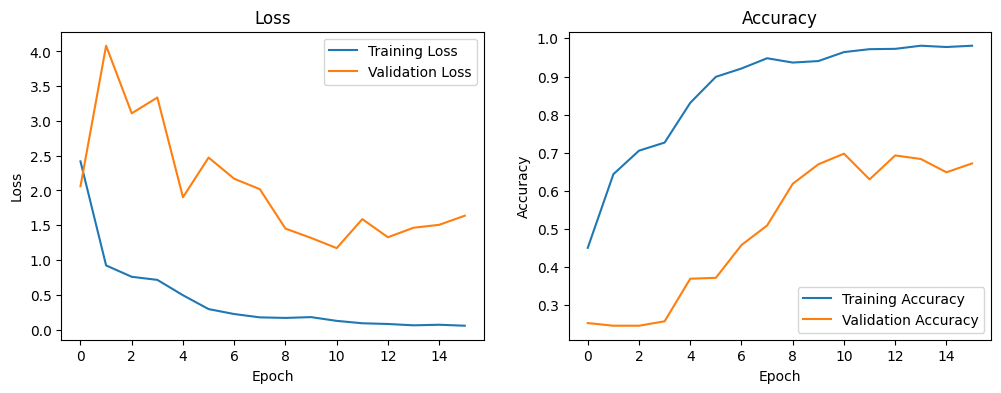

7/7 [==============================] - 2s 252ms/step
              precision    recall  f1-score   support

       daisy       0.67      0.72      0.70        76
   dandelion       0.74      0.81      0.77       105
        rose       0.71      0.37      0.49        78
   sunflower       0.80      0.73      0.76        73
       tulip       0.62      0.80      0.70        98

    accuracy                           0.70       430
   macro avg       0.71      0.69      0.68       430
weighted avg       0.70      0.70      0.69       430



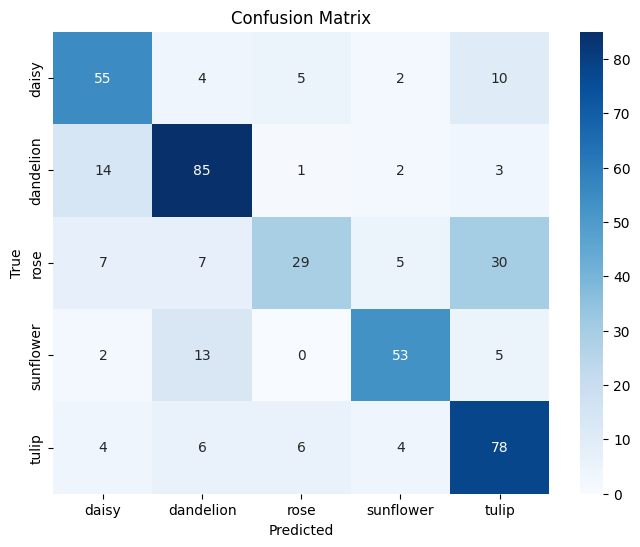

In [ ]:
plot_history(history_base_bn)

y_pred = model_base_bn.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)

**7. Improve the accuracy by trying something extra. (20 points)**

* By incorporating additional training strategies such as regularization techniques like dropout, data augmentation, and batch or layer normalization, can the accuracy of the model be improved?

* Modify the given model architecture to improve the accuracy over the baseline? You can modify the model architecture by adding or removing layers, changing the number of filters, or adding skip connections.


* Use transfer learning to fine-tune an existing pre-trained model to improve accuracy?  What approach will you use for transfer learning: feature extraction or fine-tuning and why?



In [ ]:
train_gen_aug = ImageDataGenerator(
    rescale=(1./255),
    rotation_range=0.4,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator_aug = train_gen_aug.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch,
    class_mode='sparse',
    shuffle = True
)

Found 3532 images belonging to 5 classes.


# Model with L2, Batch normalization, Dropout

In [ ]:
model_l2_bn_drop = Sequential(name='model_l2_bn_drop')
model_l2_bn_drop.add(Conv2D(64, (3,3), activation='relu', input_shape=(img_height, img_width, 3),padding='same',kernel_initializer='he_normal'))
model_l2_bn_drop.add(Conv2D(64, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(BatchNormalization())

model_l2_bn_drop.add(MaxPooling2D(pool_size=(3, 3)))
model_l2_bn_drop.add(Dropout(0.1))
model_l2_bn_drop.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(128, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))

model_l2_bn_drop.add(BatchNormalization())
model_l2_bn_drop.add(MaxPooling2D(pool_size=(3, 3)))
model_l2_bn_drop.add(Dropout(0.1))
model_l2_bn_drop.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(256, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))

model_l2_bn_drop.add(BatchNormalization())
model_l2_bn_drop.add(MaxPooling2D(pool_size=(3, 3)))
model_l2_bn_drop.add(Dropout(0.1))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))

model_l2_bn_drop.add(BatchNormalization())
model_l2_bn_drop.add(MaxPooling2D(pool_size=(3, 3)))
model_l2_bn_drop.add(Dropout(0.1))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Conv2D(512, (3,3), activation='relu',padding='same',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))

model_l2_bn_drop.add(BatchNormalization())
model_l2_bn_drop.add(MaxPooling2D(pool_size=(2, 2)))
model_l2_bn_drop.add(Flatten())
model_l2_bn_drop.add(Dense(4096, activation='relu',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Dense(4096, activation='relu',kernel_initializer='he_normal', kernel_regularizer = l2(0.01)))
model_l2_bn_drop.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 1e-3)
model_l2_bn_drop.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_l2_bn_drop.summary()

Model: "model_l2_bn_drop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_44 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_16 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 74, 74, 64)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 74, 74, 128)  

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_l2_bn_drop = model_l2_bn_drop.fit(train_generator_aug, epochs=30, validation_data = val_generator,verbose = 1,callbacks=[early_stopping])

# Save history
with open('history_l2_bn_drop.pkl', 'wb') as file:
    pickle.dump(history_l2_bn_drop.history, file)

# Save model
model_l2_bn_drop.save('model_l2_bn_drop.h5')

Epoch 1/30
56/56 [==============================] - 906s 16s/step - loss: 239.5998 - accuracy: 0.3904 - val_loss: 228.1288 - val_accuracy: 0.2465
Epoch 2/30
56/56 [==============================] - 50s 880ms/step - loss: 217.3835 - accuracy: 0.5218 - val_loss: 207.2828 - val_accuracy: 0.2442
Epoch 3/30
56/56 [==============================] - 49s 873ms/step - loss: 196.9678 - accuracy: 0.5563 - val_loss: 188.2231 - val_accuracy: 0.2558
Epoch 4/30
56/56 [==============================] - 50s 888ms/step - loss: 178.6343 - accuracy: 0.5980 - val_loss: 171.7474 - val_accuracy: 0.2442
Epoch 5/30
56/56 [==============================] - 49s 871ms/step - loss: 162.3698 - accuracy: 0.6234 - val_loss: 156.5783 - val_accuracy: 0.2558
Epoch 6/30
56/56 [==============================] - 49s 879ms/step - loss: 148.1117 - accuracy: 0.6367 - val_loss: 143.5146 - val_accuracy: 0.2558
Epoch 7/30
56/56 [==============================] - 50s 880ms/step - loss: 135.3167 - accuracy: 0.6724 - val_loss: 131.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


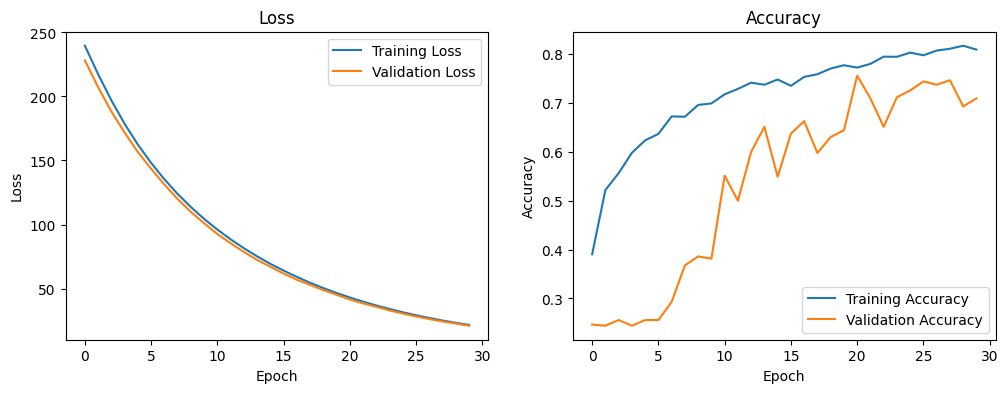

7/7 [==============================] - 2s 238ms/step
              precision    recall  f1-score   support

       daisy       0.75      0.76      0.76        76
   dandelion       0.69      0.91      0.79       105
        rose       0.54      0.77      0.63        78
   sunflower       0.86      0.88      0.87        73
       tulip       0.96      0.28      0.43        98

    accuracy                           0.71       430
   macro avg       0.76      0.72      0.70       430
weighted avg       0.77      0.71      0.69       430



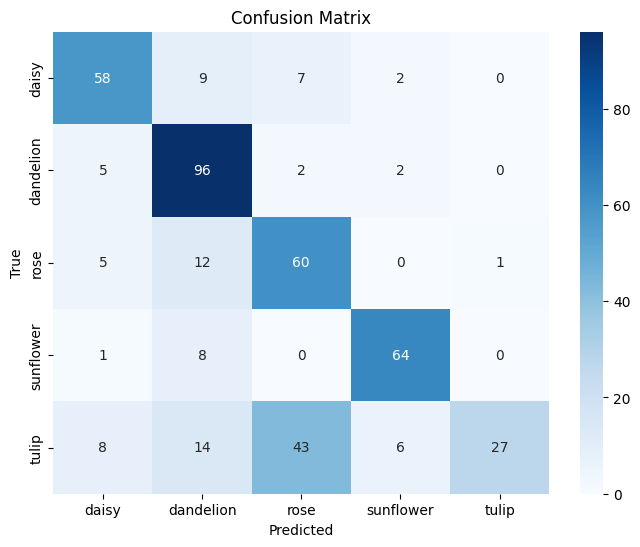

In [ ]:
plot_history(history_l2_bn_drop)

y_pred = model_l2_bn_drop.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)

# VGG16

In [ ]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(input_shape=(img_height, img_width,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model_vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model_vgg16.add(Flatten())
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate = 1e-4)
model_vgg16.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_83 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_21 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_84 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_85 (Conv2D)          (None, 112, 112, 128)    

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_vgg16 = model_vgg16.fit(train_generator, epochs=100, validation_data = val_generator, verbose = 1, callbacks=[early_stopping])

# Save history
with open('history_vgg16.pkl', 'wb') as file:
    pickle.dump(history_vgg16.history, file)

# Save model
model_vgg16.save('model_vgg16.h5')

Epoch 1/100
56/56 [==============================] - 34s 598ms/step - loss: 0.3635 - accuracy: 0.8686 - val_loss: 3.2907 - val_accuracy: 0.2442
Epoch 2/100
56/56 [==============================] - 33s 582ms/step - loss: 0.3131 - accuracy: 0.8907 - val_loss: 10.8420 - val_accuracy: 0.2442
Epoch 3/100
56/56 [==============================] - 33s 579ms/step - loss: 0.2039 - accuracy: 0.9315 - val_loss: 6.3682 - val_accuracy: 0.2581
Epoch 4/100
55/56 [============================>.] - ETA: 0s - loss: 0.1678 - accuracy: 0.9495

KeyboardInterrupt: 

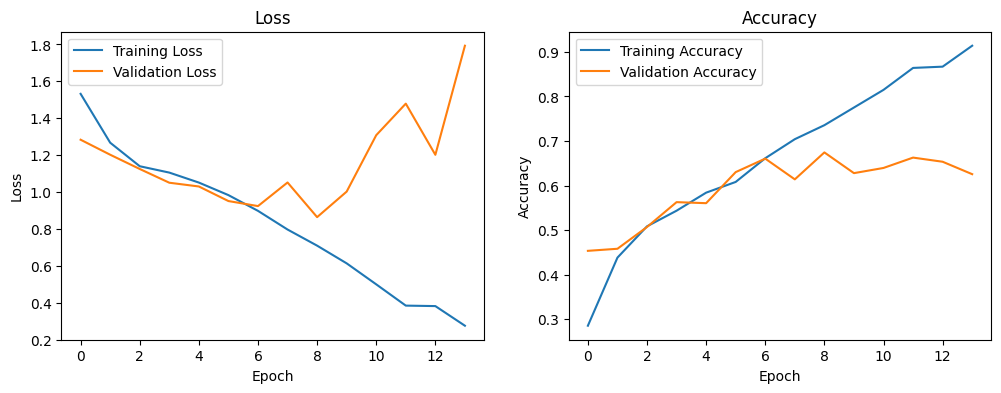

7/7 [==============================] - 2s 259ms/step
              precision    recall  f1-score   support

       daisy       0.77      0.63      0.70        76
   dandelion       0.68      0.74      0.71       105
        rose       0.52      0.55      0.53        78
   sunflower       0.82      0.79      0.81        73
       tulip       0.64      0.64      0.64        98

    accuracy                           0.67       430
   macro avg       0.68      0.67      0.68       430
weighted avg       0.68      0.67      0.68       430



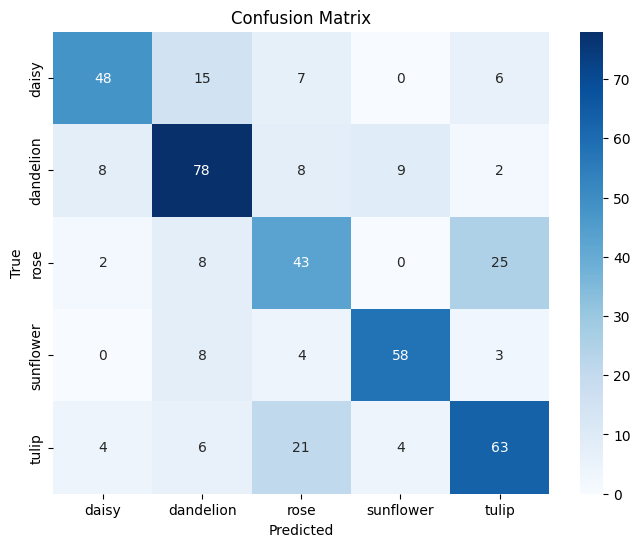

In [ ]:
plot_history(history_vgg16)

y_pred = model_vgg16.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)

# VGG16 pretrained

58889256/58889256 [==============================] - 0s 0us/step


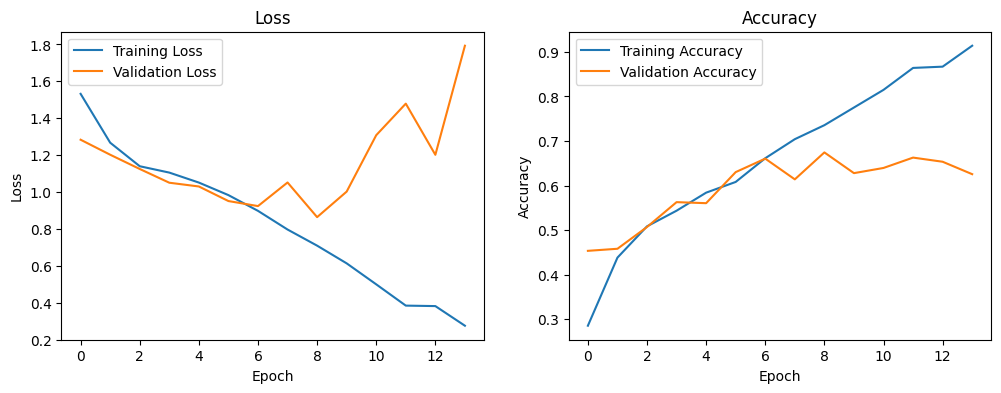

7/7 [==============================] - 2s 248ms/step
              precision    recall  f1-score   support

       daisy       0.00      0.00      0.00        76
   dandelion       0.00      0.00      0.00       105
        rose       0.00      0.00      0.00        78
   sunflower       0.17      1.00      0.29        73
       tulip       0.00      0.00      0.00        98

    accuracy                           0.17       430
   macro avg       0.03      0.20      0.06       430
weighted avg       0.03      0.17      0.05       430



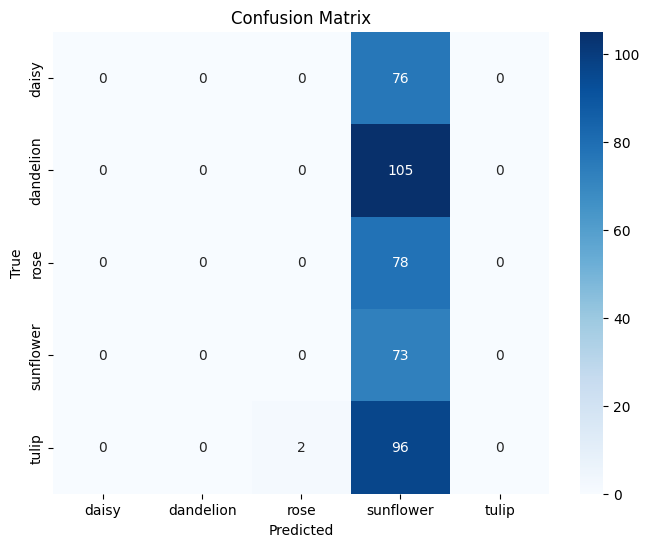

In [ ]:

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model by adding a global average pooling layer and a dense output layer
model_vgg16_pretrained = Sequential()
model_vgg16_pretrained.add(vgg16)
model_vgg16_pretrained.add(GlobalAveragePooling2D())
model_vgg16_pretrained.add(Dense(5, activation='softmax'))

plot_history(history_vgg16)

y_pred = model_vgg16_pretrained.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

plot_confusion_matrix(y_true, y_pred)




# VGG16 finetuning

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_6  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_24 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 14717253 (56.14 MB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 17s 295ms/step - loss: 1.0447 - accuracy: 0.6099 - val_loss: 0.7720 - val_accuracy: 0.7279
Epoch 2/100
56/56 [==============================] - 17s 296ms/s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


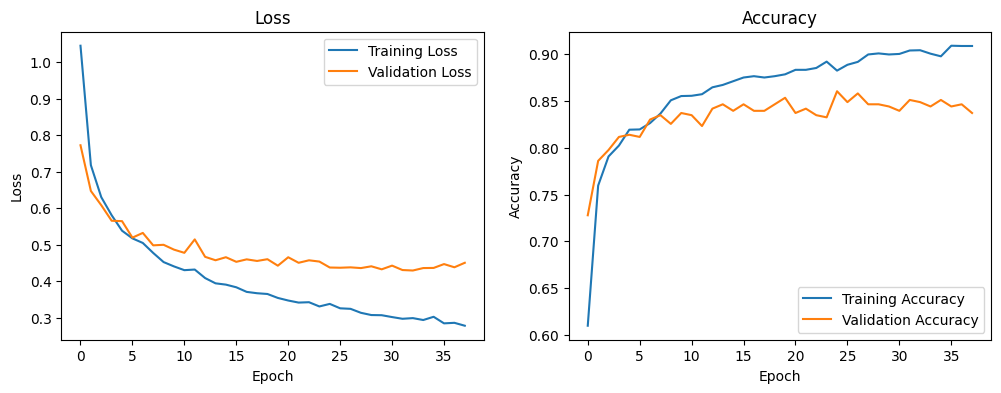

7/7 [==============================] - 2s 243ms/step
              precision    recall  f1-score   support

       daisy       0.88      0.80      0.84        76
   dandelion       0.87      0.88      0.87       105
        rose       0.80      0.87      0.83        78
   sunflower       0.82      0.86      0.84        73
       tulip       0.87      0.83      0.85        98

    accuracy                           0.85       430
   macro avg       0.85      0.85      0.85       430
weighted avg       0.85      0.85      0.85       430



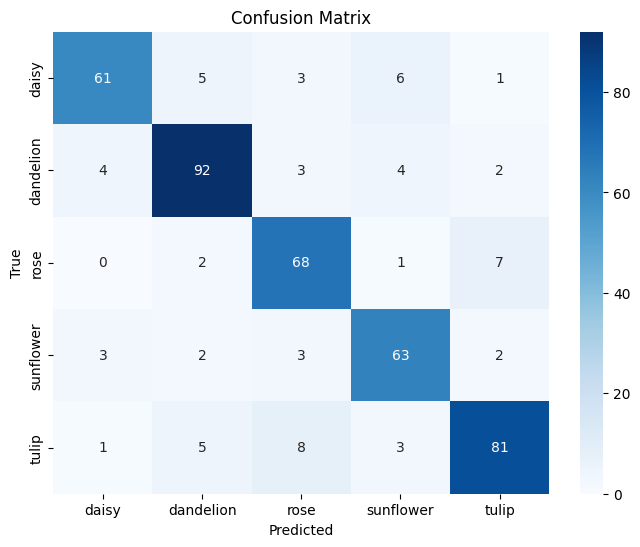

In [ ]:
model_vgg16_finetune = Sequential()
model_vgg16_finetune.add(vgg16)
model_vgg16_finetune.add(GlobalAveragePooling2D())
model_vgg16_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-2)
model_vgg16_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_vgg16_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_vgg16_finetune = model_vgg16_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_vgg16_finetune.pkl', 'wb') as file:
    pickle.dump(history_vgg16_finetune.history, file)

# Save model
model_vgg16_finetune.save('model_vgg16_finetune.h5')

# Plot the training history
plot_history(history_vgg16_finetune)

# Make predictions on the validation set
y_pred = model_vgg16_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


# Resnet50 finetune


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 23597957 (90.02 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 1614s 29s/step - loss: 1.5920 - accuracy: 0.3369 - val_loss: 1.6103 - val_accuracy: 0.3116


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


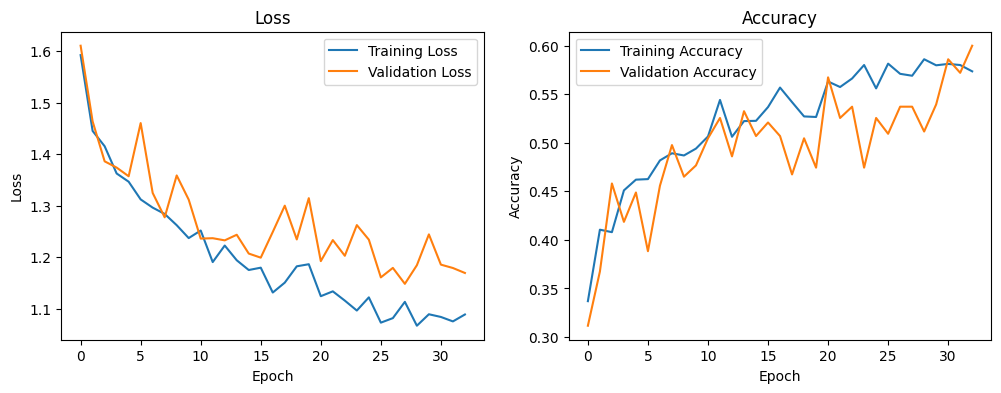

7/7 [==============================] - 3s 236ms/step
              precision    recall  f1-score   support

       daisy       0.62      0.58      0.60        76
   dandelion       0.49      0.69      0.57       105
        rose       0.42      0.46      0.44        78
   sunflower       0.63      0.44      0.52        73
       tulip       0.64      0.48      0.55        98

    accuracy                           0.54       430
   macro avg       0.56      0.53      0.53       430
weighted avg       0.56      0.54      0.54       430



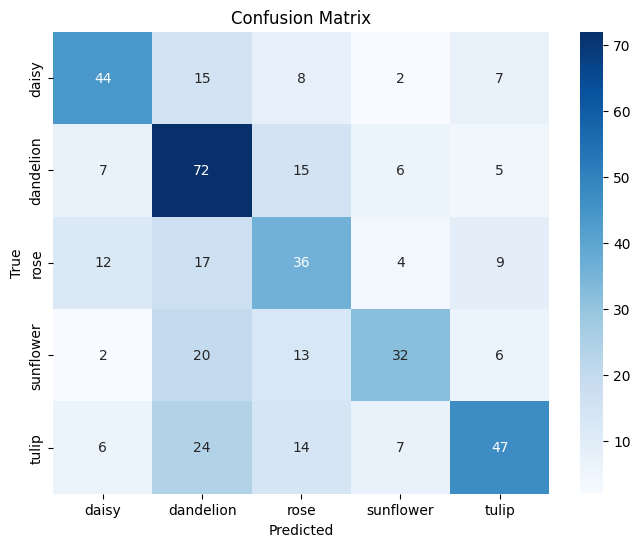

In [ ]:
# Load the Resnet50 model
resnet50 = Reset50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in resnet50.layers:
    layer.trainable = False


model_resnet50_finetune = Sequential()
model_resnet50_finetune.add(resnet50)
model_resnet50_finetune.add(GlobalAveragePooling2D())
model_resnet50_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the resnet50 model
for layer in resnet50.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-2)
model_resnet50_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_resnet50_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_resnet50_finetune = model_resnet50_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_resnet50_finetune.pkl', 'wb') as file:
    pickle.dump(history_resnet50_finetune.history, file)

# Save model
model_resnet50_finetune.save('model_resnet50_finetune.h5')

# Plot the training history
plot_history(history_resnet50_finetune)

# Make predictions on the validation set
y_pred = model_resnet50_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


# DenseNet121 finetune

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_6  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 7042629 (26.87 MB)
Trainable params: 5125 (20.02 KB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 25s 335ms/step - loss: 1.0437 - accuracy: 0.6065 - val_loss: 0.5988 - val_accuracy: 0.8186
Epoch 2/100
56/56 [==============================] - 16s 289ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


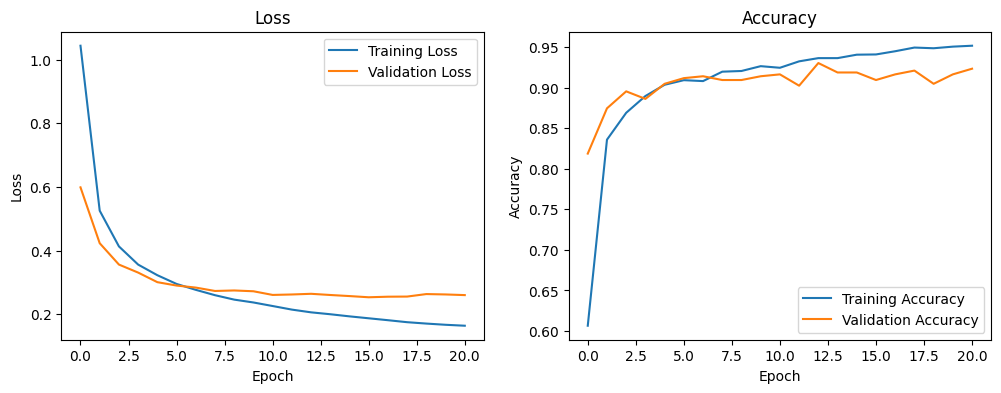

7/7 [==============================] - 4s 242ms/step
              precision    recall  f1-score   support

       daisy       0.95      0.93      0.94        76
   dandelion       0.92      0.93      0.93       105
        rose       0.88      0.85      0.86        78
   sunflower       0.91      0.93      0.92        73
       tulip       0.89      0.90      0.89        98

    accuracy                           0.91       430
   macro avg       0.91      0.91      0.91       430
weighted avg       0.91      0.91      0.91       430



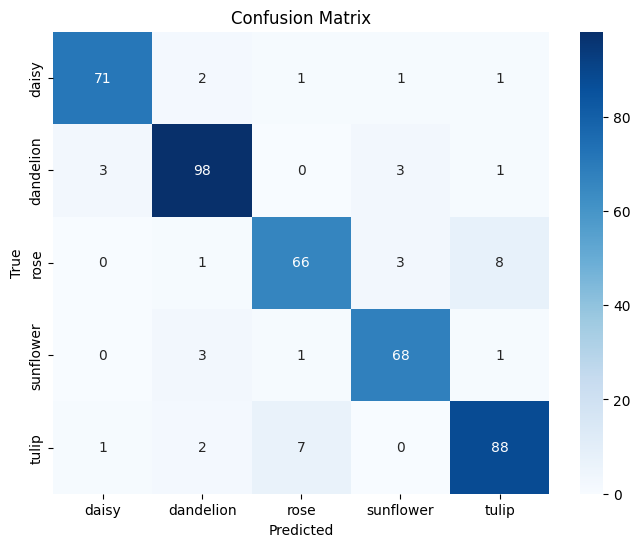

In [ ]:
# Load the densenet121 model
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in densenet121.layers:
    layer.trainable = False


model_densenet121_finetune = Sequential()
model_densenet121_finetune.add(densenet121)
model_densenet121_finetune.add(GlobalAveragePooling2D())
model_densenet121_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the densenet121 model
for layer in densenet121.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model_densenet121_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_densenet121_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_densenet121_finetune = model_densenet121_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_densenet121_finetune.pkl', 'wb') as file:
    pickle.dump(history_densenet121_finetune.history, file)

# Save model
model_densenet121_finetune.save('model_densenet121_finetune.h5')

# Plot the training history
plot_history(history_densenet121_finetune)

# Make predictions on the validation set
y_pred = model_densenet121_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


# InceptionV3 finetune


87910968/87910968 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 1217s 22s/step - loss: 0.8893 - accuracy: 0.6685 - val_loss: 0.5228 - val_accuracy: 0.8256


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


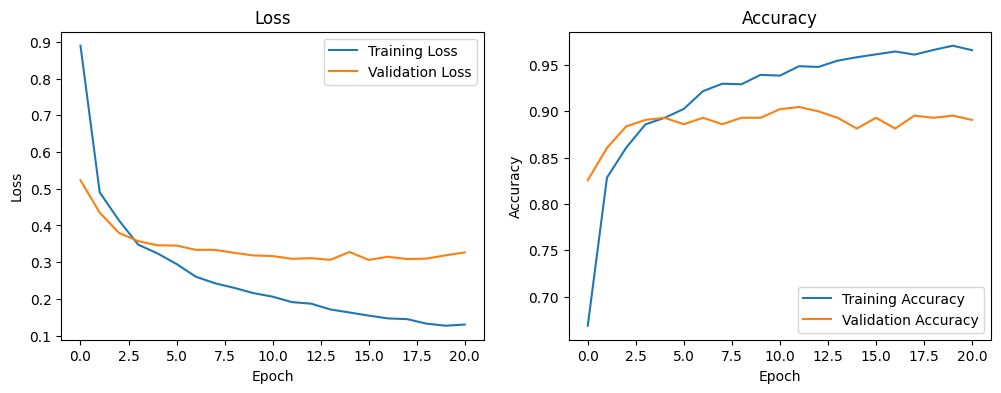

7/7 [==============================] - 3s 235ms/step
              precision    recall  f1-score   support

       daisy       0.91      0.92      0.92        76
   dandelion       0.93      0.94      0.93       105
        rose       0.83      0.88      0.86        78
   sunflower       0.90      0.84      0.87        73
       tulip       0.89      0.87      0.88        98

    accuracy                           0.89       430
   macro avg       0.89      0.89      0.89       430
weighted avg       0.89      0.89      0.89       430



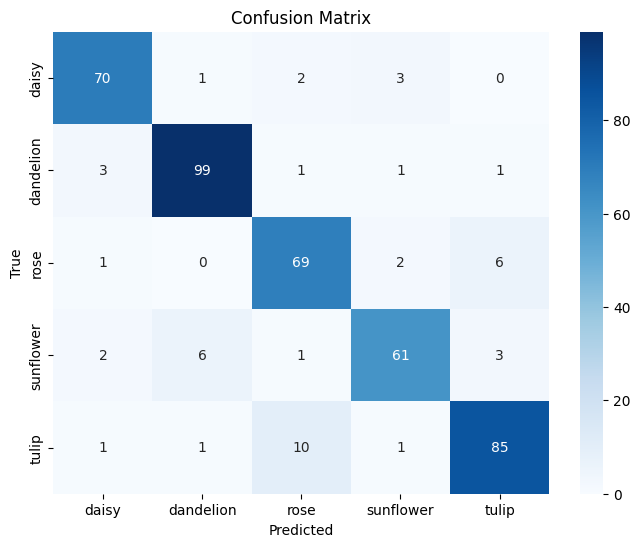

In [ ]:
# Load the inceptionv3 model
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in inceptionv3.layers:
    layer.trainable = False


model_inceptionv3_finetune = Sequential()
model_inceptionv3_finetune.add(inceptionv3)
model_inceptionv3_finetune.add(GlobalAveragePooling2D())
model_inceptionv3_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the inceptionv3 model
for layer in inceptionv3.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model_inceptionv3_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_inceptionv3_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_inceptionv3_finetune = model_inceptionv3_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_inceptionv3_finetune.pkl', 'wb') as file:
    pickle.dump(history_inceptionv3_finetune.history, file)

# Save model
model_inceptionv3_finetune.save('model_inceptionv3_finetune.h5')

# Plot the training history
plot_history(history_inceptionv3_finetune)

# Make predictions on the validation set
y_pred = model_inceptionv3_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


# MobileNetV3Large


12683000/12683000 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 global_average_pooling2d_1  (None, 960)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 5)                 4805      
                                                                 
Total params: 3001157 (11.45 MB)
Trainable params: 4805 (18.77 KB)
Non-trainable params: 2996352 (11.43 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 21s 309ms/step - loss: 1.6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


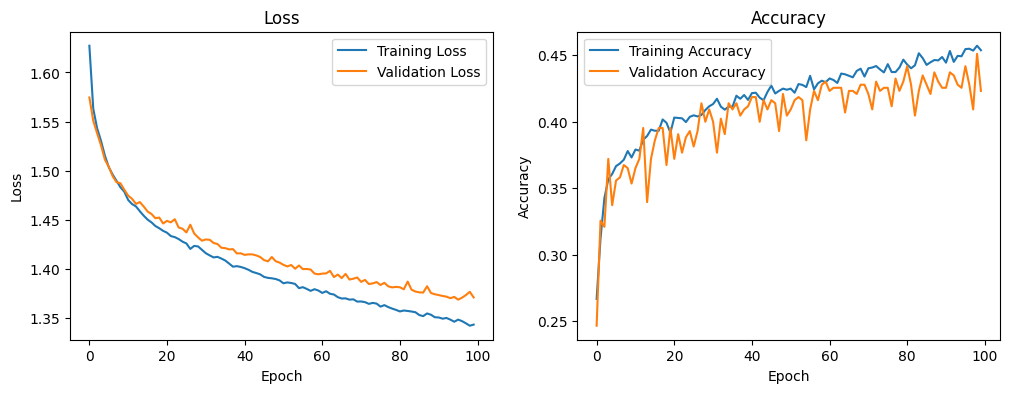

7/7 [==============================] - 3s 238ms/step
              precision    recall  f1-score   support

       daisy       0.60      0.38      0.47        76
   dandelion       0.43      0.69      0.53       105
        rose       0.37      0.27      0.31        78
   sunflower       0.38      0.22      0.28        73
       tulip       0.38      0.45      0.41        98

    accuracy                           0.42       430
   macro avg       0.43      0.40      0.40       430
weighted avg       0.43      0.42      0.41       430



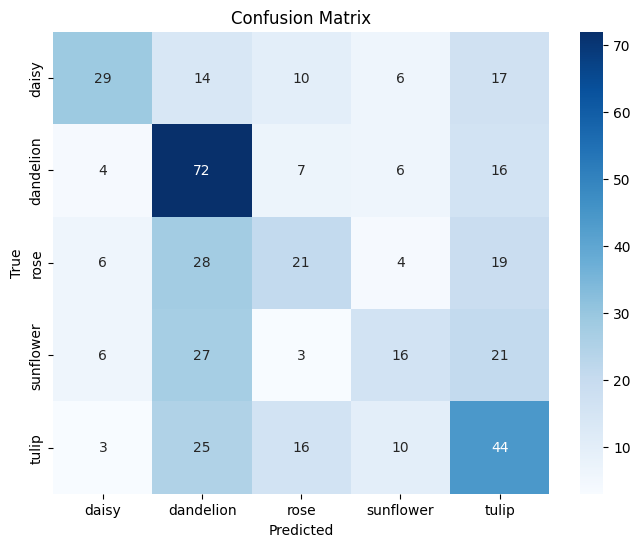

In [ ]:
# Load the mobilenetv3_large model
mobilenetv3_large = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in mobilenetv3_large.layers:
    layer.trainable = False


model_mobilenetv3_large_finetune = Sequential()
model_mobilenetv3_large_finetune.add(mobilenetv3_large)
model_mobilenetv3_large_finetune.add(GlobalAveragePooling2D())
model_mobilenetv3_large_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the mobilenetv3_large model
for layer in mobilenetv3_large.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model_mobilenetv3_large_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_mobilenetv3_large_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_mobilenetv3_large_finetune = model_mobilenetv3_large_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_mobilenetv3_large_finetune.pkl', 'wb') as file:
    pickle.dump(history_mobilenetv3_large_finetune.history, file)

# Save model
model_mobilenetv3_large_finetune.save('model_mobilenetv3_large_finetune.h5')

# Plot the training history
plot_history(history_mobilenetv3_large_finetune)

# Make predictions on the validation set
y_pred = model_mobilenetv3_large_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/100
56/56 [==============================] - 20s 306ms/step - loss: 0.8977 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


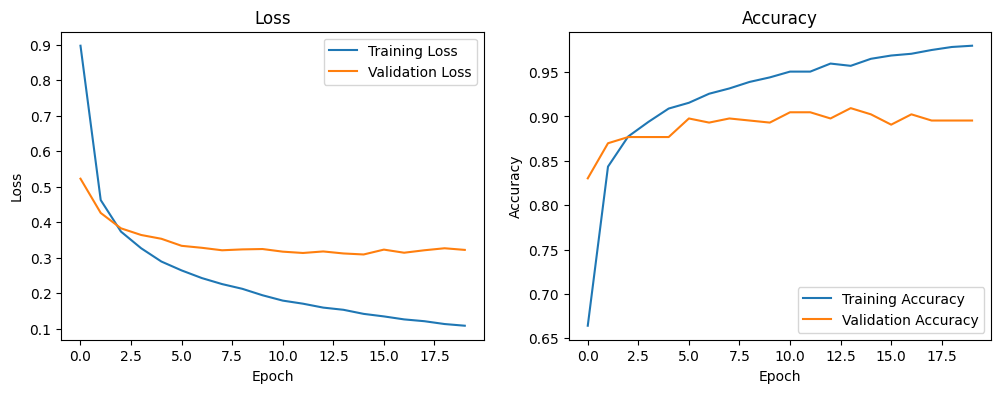

7/7 [==============================] - 3s 275ms/step
              precision    recall  f1-score   support

       daisy       0.91      0.89      0.90        76
   dandelion       0.95      0.95      0.95       105
        rose       0.84      0.83      0.84        78
   sunflower       0.96      0.95      0.95        73
       tulip       0.85      0.88      0.86        98

    accuracy                           0.90       430
   macro avg       0.90      0.90      0.90       430
weighted avg       0.90      0.90      0.90       430



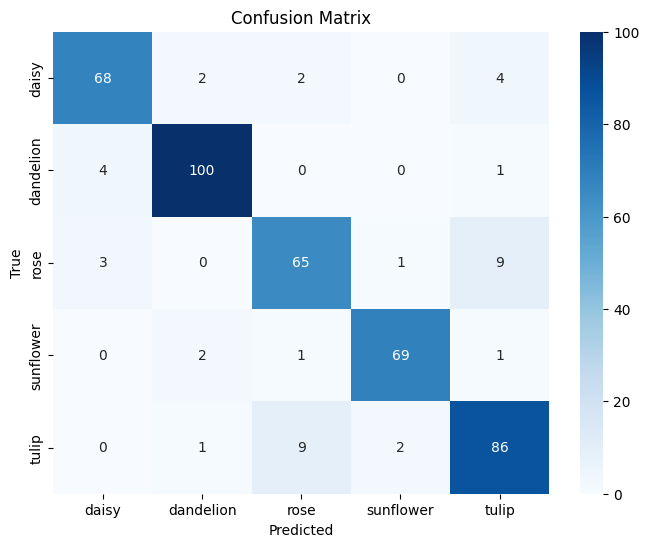

In [ ]:
# Load the mobilenetv2 model
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the VGG16 model
for layer in mobilenetv2.layers:
    layer.trainable = False


model_mobilenetv2_finetune = Sequential()
model_mobilenetv2_finetune.add(mobilenetv2)
model_mobilenetv2_finetune.add(GlobalAveragePooling2D())
model_mobilenetv2_finetune.add(Dense(5, activation='softmax'))

# Freeze the layers of the mobilenetv2 model
for layer in mobilenetv2.layers:
    layer.trainable = False

# Compile the model
optimizer = Adam(learning_rate=1e-3)
model_mobilenetv2_finetune.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_mobilenetv2_finetune.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_mobilenetv2_finetune = model_mobilenetv2_finetune.fit(train_generator, epochs=100, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

# Save history
with open('history_mobilenetv2_finetune.pkl', 'wb') as file:
    pickle.dump(history_mobilenetv2_finetune.history, file)

# Save model
model_mobilenetv2_finetune.save('model_mobilenetv2_finetune.h5')

# Plot the training history
plot_history(history_mobilenetv2_finetune)

# Make predictions on the validation set
y_pred = model_mobilenetv2_finetune.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred)
